# Pandas入門
## Pandasでcsvデータを読み込んで操作

1. csvをpandasのデータフレームで読み込む
2. データにアクセス，抽出
3. 操作
4. マージ
5. グループ化
6. 累計
7. グラフ

対応する動画：[Pandas入門　②操作，マージ【研究で使うPython #54】](https://youtu.be/aNo9gazul5A)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## csvデータのダウンロード
[厚生労働省のサイト](https://www.mhlw.go.jp/stf/covid-19/open-data.html)からオープンデータの新型コロナの**新規陽性者数の推移データ（[newly_confirmed_cases_daily.csv](https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv)）**と**重傷者数の推移データ（[severe_cases_daily.csv](https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv)）**をダウンロードし，このJupyterファイルと同じフォルダに置く

## 1. 新規陽性者数データを読み込む
元の列名にスペースが含まれているので，列名を変更  
Newly confirmed cases→new_cases

In [3]:
import pandas as pd # pandasのimport

case_df = pd.read_csv('newly_confirmed_cases_daily.csv')\
.rename(columns={'Newly confirmed cases':'new_cases'})  # 列名を変更

### データを表示

In [4]:
case_df

,Date,Prefecture,new_cases
0,2020/1/16,ALL,1
1,2020/1/16,Hokkaido,0
2,2020/1/16,Aomori,0
3,2020/1/16,Iwate,0
4,2020/1/16,Miyagi,0
...,...,...,...
30715,2021/10/16,Kumamoto,14
30716,2021/10/16,Oita,2
30717,2021/10/16,Miyazaki,0
30718,2021/10/16,Kagoshima,4


### データの情報
行数や列数，列の型名など基本的な情報が得られる．

In [5]:
case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30720 entries, 0 to 30719
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        30720 non-null  object
 1   Prefecture  30720 non-null  object
 2   new_cases   30720 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 720.1+ KB


### データの基本統計情報
平均や分散など統計的な情報が得られる．

In [6]:
case_df.describe()

,new_cases
count,30720.000000
mean,111.116471
std,769.503344
min,0.000000
25%,0.000000
50%,5.000000
75%,32.000000
max,25851.000000


## 2. データにアクセス，抽出
ここでは列と行を指定してデータにアクセスしたり，特定の列や行を指定して抽出するやり方を紹介する．

### アクセス

In [7]:
# どちらでも良い
print(case_df['new_cases'][15703])
print(case_df.at[15703, 'new_cases'])

7
7


### 列を抽出

In [8]:
case_df.new_cases

0         1
1         0
2         0
3         0
4         0
         ..
30715    14
30716     2
30717     0
30718     4
30719    25
Name: new_cases, Length: 30720, dtype: int64

### 行を抽出

In [9]:
case_df.loc[15703]

Date          2020/12/8
Prefecture    Fukushima
new_cases             7
Name: 15703, dtype: object

In [10]:
case_df.loc[15703:15711]

,Date,Prefecture,new_cases
15703,2020/12/8,Fukushima,7
15704,2020/12/8,Ibaraki,34
15705,2020/12/8,Tochigi,17
15706,2020/12/8,Gunma,32
15707,2020/12/8,Saitama,172
15708,2020/12/8,Chiba,80
15709,2020/12/8,Tokyo,354
15710,2020/12/8,Kanagawa,152
15711,2020/12/8,Niigata,4


## 3. 操作

### クエリで日毎の日本全体の陽性者数を得る

In [11]:
case_all_df = case_df[case_df.Prefecture=='ALL']
case_all_df

,Date,Prefecture,new_cases
0,2020/1/16,ALL,1
48,2020/1/17,ALL,0
96,2020/1/18,ALL,0
144,2020/1/19,ALL,0
192,2020/1/20,ALL,0
...,...,...,...
30480,2021/10/12,ALL,609
30528,2021/10/13,ALL,723
30576,2021/10/14,ALL,612
30624,2021/10/15,ALL,522


### 合計

In [12]:
total_cases = case_all_df.new_cases.sum()
print(total_cases)

1706824


### ソート

In [13]:
case_all_df.sort_values('new_cases', ascending=False).head(10)

,Date,Prefecture,new_cases
27936,2021/8/20,ALL,25851
27984,2021/8/21,ALL,25460
27888,2021/8/19,ALL,25140
28224,2021/8/26,ALL,24961
28176,2021/8/25,ALL,24308
28272,2021/8/27,ALL,24182
27840,2021/8/18,ALL,23910
28320,2021/8/28,ALL,22728
28032,2021/8/22,ALL,22271
28128,2021/8/24,ALL,21556


## 4. マージ

### 重傷者数のデータも読み込む

In [14]:
severe_df = pd.read_csv('severe_cases_daily.csv')\
            .rename(columns={'Severe cases':'severe_cases'})  # 列の名前を変えてる
severe_df

,Date,Prefecture,severe_cases
0,2020/5/9,ALL,267
1,2020/5/9,Hokkaido,23
2,2020/5/9,Aomori,0
3,2020/5/9,Iwate,0
4,2020/5/9,Miyagi,0
...,...,...,...
25243,2021/10/16,Kumamoto,2
25244,2021/10/16,Oita,0
25245,2021/10/16,Miyazaki,0
25246,2021/10/16,Kagoshima,0


### 陽性者数データと重症者数データをマージ

In [15]:
merged_df = case_df.merge(severe_df, on=['Date','Prefecture'])  # 日付と都道府県でつなげる
merged_df

,Date,Prefecture,new_cases,severe_cases
0,2020/5/9,ALL,108,267
1,2020/5/9,Hokkaido,11,23
2,2020/5/9,Aomori,0,0
3,2020/5/9,Iwate,0,0
4,2020/5/9,Miyagi,0,0
...,...,...,...,...
25243,2021/10/16,Kumamoto,14,2
25244,2021/10/16,Oita,2,0
25245,2021/10/16,Miyazaki,0,0
25246,2021/10/16,Kagoshima,4,0


## 5. グループ化

### 都道府県でグループ化して合計を表示

In [16]:
merged_pref_df = merged_df.groupby('Prefecture')[['new_cases', 'severe_cases']].sum()
merged_pref_df

,new_cases,severe_cases
Prefecture,,
ALL,1691236,313935
Aichi,105360,14216
Akita,1878,227
Aomori,5858,616
Chiba,98861,11978
Ehime,5259,1240
Fukui,2978,501
Fukuoka,73565,9656
Fukushima,9405,3274


### 日付でグループ化もできる

In [17]:
# datetime型に変える
merged_df['Date'] = pd.to_datetime(merged_df.Date)
merged_df

,Date,Prefecture,new_cases,severe_cases
0,2020-05-09,ALL,108,267
1,2020-05-09,Hokkaido,11,23
2,2020-05-09,Aomori,0,0
3,2020-05-09,Iwate,0,0
4,2020-05-09,Miyagi,0,0
...,...,...,...,...
25243,2021-10-16,Kumamoto,14,2
25244,2021-10-16,Oita,2,0
25245,2021-10-16,Miyazaki,0,0
25246,2021-10-16,Kagoshima,4,0


In [18]:
# 年月日，曜日の情報を追加する
merged_df['year'] = pd.DatetimeIndex(merged_df.Date).year
merged_df['month'] = pd.DatetimeIndex(merged_df.Date).month
merged_df['day'] = pd.DatetimeIndex(merged_df.Date).day
merged_df['weekday'] = pd.DatetimeIndex(merged_df.Date).weekday

merged_df

,Date,Prefecture,new_cases,severe_cases,year,month,day,weekday
0,2020-05-09,ALL,108,267,2020,5,9,5
1,2020-05-09,Hokkaido,11,23,2020,5,9,5
2,2020-05-09,Aomori,0,0,2020,5,9,5
3,2020-05-09,Iwate,0,0,2020,5,9,5
4,2020-05-09,Miyagi,0,0,2020,5,9,5
...,...,...,...,...,...,...,...,...
25243,2021-10-16,Kumamoto,14,2,2021,10,16,5
25244,2021-10-16,Oita,2,0,2021,10,16,5
25245,2021-10-16,Miyazaki,0,0,2021,10,16,5
25246,2021-10-16,Kagoshima,4,0,2021,10,16,5


### 月でグループ化

In [19]:
# 月毎の平均データ
merged_all_df = merged_df[merged_df.Prefecture == 'ALL'].copy()
merged_month_df = merged_all_df.groupby('month')[['new_cases', 'severe_cases']].mean()
merged_month_df

,new_cases,severe_cases
month,,
1,4990.322581,919.387097
2,1494.214286,644.285714
3,1364.516129,352.451613
4,3916.566667,679.733333
5,2867.203704,791.592593
6,912.100000,454.883333
7,2316.870968,257.677419
8,9612.354839,882.145161
9,3696.683333,923.600000


### 年を跨いで月平均を出してしまっているので，月と年でグループ化

In [20]:
merged_YM_df = merged_all_df.groupby(['year','month'])[['new_cases', 'severe_cases']].mean()
merged_YM_df

new_cases  severe_cases
year month                            
2020 5         49.869565    192.043478
     6         58.233333     72.833333
     7        560.419355     49.612903
     8       1031.645161    199.612903
     9        501.500000    184.533333
     10       565.451613    151.935484
     11      1571.933333    286.066667
     12      2791.645161    595.322581
2021 1       4990.322581    919.387097
     2       1494.214286    644.285714
     3       1364.516129    352.451613
     4       3916.566667    679.733333
     5       4957.483871   1236.419355
     6       1765.966667    836.933333
     7       4073.322581    465.741935
     8      18193.064516   1564.677419
     9       6891.866667   1662.666667
     10       794.062500    512.812500

### 曜日でグループ化

In [22]:
# 曜日ごとの平均データ（0が月曜で，6が日曜）
merged_weekday_df = merged_all_df.groupby('weekday')[['new_cases', 'severe_cases']].mean()
merged_weekday_df

,new_cases,severe_cases
weekday,,
0,2219.906667,599.386667
1,2978.600000,601.066667
2,3555.146667,596.800000
3,3674.493333,596.933333
4,3536.720000,595.906667
5,3529.710526,590.355263
6,3008.173333,597.480000


## 6. 累計

In [23]:
# 陽性者数の累積和を新しい列として追加
merged_all_df['total_new'] = merged_all_df.new_cases.cumsum()

In [24]:
# 重症者数の累積和を新しい列として追加
merged_all_df['total_severe'] = merged_all_df.severe_cases.cumsum()

In [25]:
merged_all_df

,Date,Prefecture,new_cases,severe_cases,year,month,day,weekday,total_new,total_severe
0,2020-05-09,ALL,108,267,2020,5,9,5,108,267
48,2020-05-10,ALL,66,249,2020,5,10,6,174,516
96,2020-05-11,ALL,58,243,2020,5,11,0,232,759
144,2020-05-12,ALL,87,259,2020,5,12,1,319,1018
192,2020-05-13,ALL,55,245,2020,5,13,2,374,1263
...,...,...,...,...,...,...,...,...,...,...
25008,2021-10-12,ALL,609,413,2021,10,12,1,1688877,312545
25056,2021-10-13,ALL,723,381,2021,10,13,2,1689600,312926
25104,2021-10-14,ALL,612,357,2021,10,14,3,1690212,313283
25152,2021-10-15,ALL,522,335,2021,10,15,4,1690734,313618


## 7. グラフ

### 折れ線グラフ
新規陽性者数と重症者数をプロット

<AxesSubplot:>

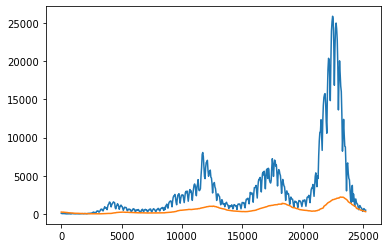

In [26]:
# 列ごとにplot()を呼び出す
merged_all_df.new_cases.plot()
merged_all_df.severe_cases.plot()

<AxesSubplot:>

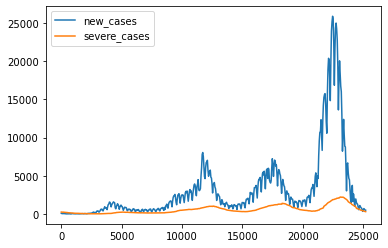

In [27]:
# DataFrame自体のplot()を呼び出すと，自動的に凡例が表示される
merged_all_df[['new_cases', 'severe_cases']].plot()

### 棒グラフ
月毎にグループ化したものを棒グラフでプロット

<AxesSubplot:xlabel='year,month'>

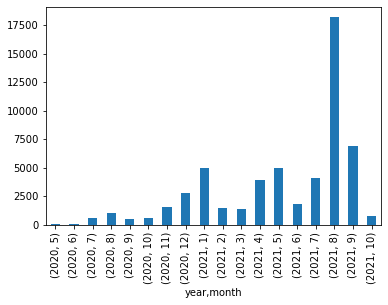

In [28]:
merged_YM_df.new_cases.plot.bar()